## <b>Big Mart Sales Prediction</b>

### <b>Project Description</b>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### <b>This problem is handled in the following way:</b>
1).Problem Statement
<br>2).Hypothesis Generation
<br>3).Loading Packages and Data
<br>4).Data Structure and Content
<br>5).Exploratory Data Analysis
<br>6).Univariate Analysis
<br>7).Bivariate Analysis
<br>8).Missing Value Treatment
<br>9).Feature Engineering
<br>10).Encoding Categorical Variables
<br>11).Label Encoding
<br>12).One Hot Encoding
<br>13).PreProcessing Data
<br>14).Modeling
<br>15).Linear Regression
<br>16).Regularized Linear Regression
<br>17).RandomForest
<br>18).XGBoost
<br>19).Summary

### <b>Hypothesis Generation</b>

#### Store Level Hypotheses:
* City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
* Population Density: Stores located in densely populated areas should have higher sales because of more demand.
* Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
* Competitors: Stores having similar establishments nearby should have less sales because of more competition.
* Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
* Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
* Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
* Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#### Product Level Hypotheses:
* Brand: Branded products should have higher sales because of higher trust in the customer.
Packaging: Products with good packaging can attract customers and sell more.
* Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
* Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
* Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
* Advertising: Better advertising of products in the store will should higher sales in most cases.
* Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

### <b>Loading packages and data</b>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the train and test data
data = pd.read_csv('Train.csv')

### <b>Understanding the data</b>

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The min value of Item_Visibility is 0, but this can not be the case as every item must have some visibility.
<br>It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### <b>Exploratory Data Analysis</b>

Item_Identifier column is referenced as Unique Product ID.The remaining columns appear to be our features, with the last column being the response/target variable.

#### Finding the count of missing values in each column

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Finding the count of unique values in each column

In [9]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
<br>There are 10 stores.
<br>Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
<br>There are only 16 Item_Type.

#### Evaluating the categorical features

In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
# calculating the frequecy of each different category in each categorical feature

# filtering the categorical features
categorical_columns = [i for i in data.dtypes.index if data.dtypes[i]=='object']

# printing the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for the feature: %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for the feature: Item_Identifier
FDG33    10
FDW13    10
FDO19     9
FDQ40     9
FDP25     9
         ..
FDC23     1
FDQ60     1
FDT35     1
FDE52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for the feature: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for the feature: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categori

#### Final Observations:
Observations:
* Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
* Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

<br>Observations on Missing Values
* The missing values of Item_Weight and Outlet_Size need to be imputed
* The min value of Item_Visibility is 0, but this can not be the case as every item must have some visibility.

<br>Observations on Data Analysis to be done
* There are 10 stores.
* Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
* There are only 16 Item_Type.

<br>Observations on Feature engineering to be done
* It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.
* There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
* Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

In [12]:
# Imputing the missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# As the feature Item_Weight is continous , we can replace the missing values with mean
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())


In [14]:
# Outlet_Size is a categorical attribute,
# replacing the null values with mode value
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode())


In [15]:
# The min value of Item_Visibility is 0, but this can not be the case as every item must have some visibility.
# We want to replace the 0 values for the mean visibility value of that product in each store.

# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
Name: Item_Visibility, dtype: int64

In [16]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())


In [17]:
data['Item_Visibility'].value_counts().head()

0.066132    526
0.076975      3
0.159165      2
0.112682      2
0.037550      2
Name: Item_Visibility, dtype: int64

#### Convert Low Fat, low fat and LF to Low Fat and reg and Regular to Regular

In [18]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)


0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [19]:
# Frequency of Categories for the feature Item_Fat_Content
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
# Checking if there are any duplicates in the data
duplicates = data.duplicated()
duplicates.sum()

0

There are no duplicates in our data.

{'whiskers': [<matplotlib.lines.Line2D at 0x2286b120970>,
 'caps': [<matplotlib.lines.Line2D at 0x2286b147070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2286b120610>],
 'medians': [<matplotlib.lines.Line2D at 0x2286b147730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2286b147a90>],
 'means': []}

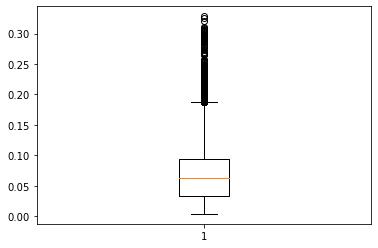

In [100]:
# checking the outliers in the data
plt.boxplot(data["Item_Visibility"])

We can see that there are outliers in the data.

### <b>Feature Engineering</b>

#### Converting the Outlet_Establishment_Years into how old the establishments are

In [26]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

#### Create broader category for type of item

##### Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean

In [27]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

These seem to stand for Food, Drink and Non-Consumable. So let's rename them to be more intuitive.

In [28]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [29]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [30]:
data['Item_Type_Category'].unique()

array(['Food', 'Drink', 'Non-Consumable'], dtype=object)

In [31]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
data.loc[data['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

#### Make a new category for items that reflect their sales - very high, high, medium, low

Recall that there are more Item_RMP than Item_Identifier, indicating that different stores have different Item_MRP. We can visualise the Item_RMP grouped by the Item_Type and Outlet_Type

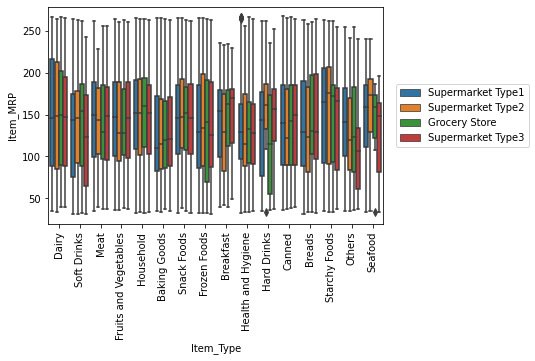

In [33]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

Now we can have a look at the distribution of all Item_MRP.

c:\Users\POOJITHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


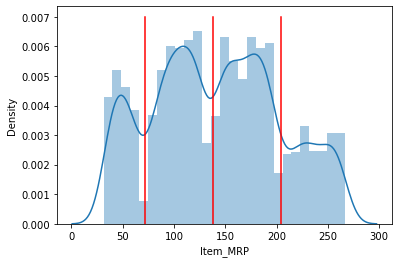

In [34]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'

In [35]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         3002
Medium       2750
Very High    1429
Low          1342
Name: Item_MRP_Category, dtype: int64

### <b>Univariate and Bivariate Analysis</b>

##### <b>Numerical Data</b>

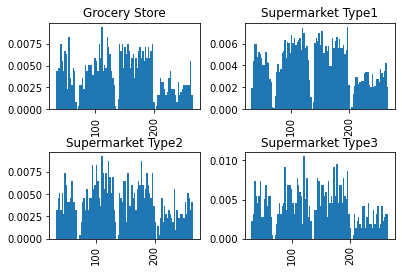

In [36]:
# As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

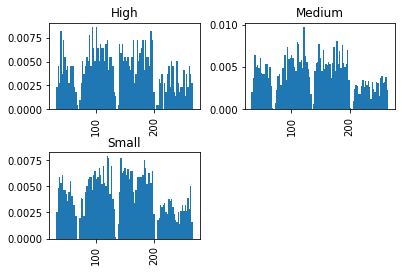

In [37]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

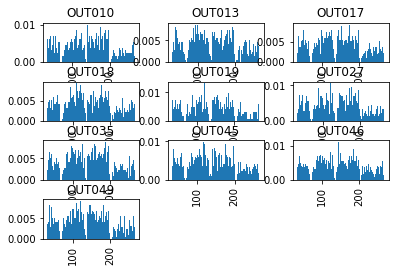

In [38]:
ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

So the different categories of Item_MRP are well represented accross all outlets.

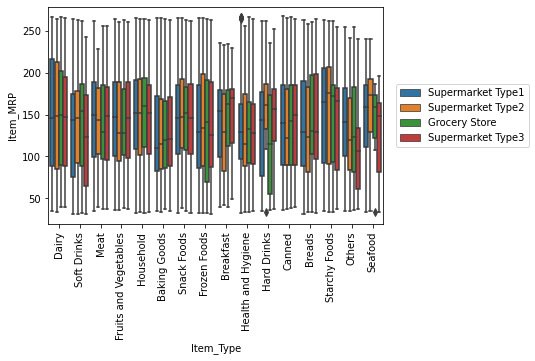

In [39]:
# Exploring how Item_MRP depends on Outlet_Type
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


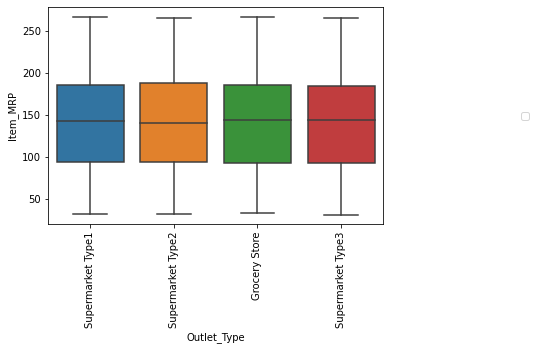

In [40]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_MRP does not differ depending on Outlet_Type.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

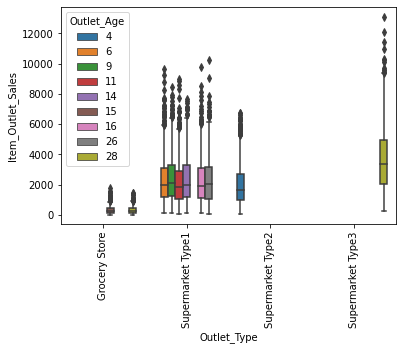

In [41]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

We can see that type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

#### <b>Categorical Data</b>

In [42]:
# checking the frequecy of each different category in each categorical feature
# filtering the categorical features
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Identifier
FDG33    10
FDW13    10
FDO19     9
FDQ40     9
FDP25     9
         ..
FDC23     1
FDQ60     1
FDT35     1
FDE52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for variable Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
O

### <b> Encoding Categorical Variables </b>

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,Very High
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drink,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,High
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15,Food,High
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,Low


In [44]:
# dropping the Outlet_Establishment_Year column from the data
data = data.drop(columns=['Outlet_Establishment_Year'], axis=1)

In [45]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Type_Category', 'Item_MRP_Category'],
      dtype='object')

#### <b>Label Encoding</b>
Numerical Coding of Categorical Data

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,14,1,3,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,1,2,2,443.4228,4,0,1,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,14,1,0,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,3,2,0,732.3800,15,1,0,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,0,2,1,994.7052,26,2,1,1


#### <b>Once-hot encoding of categorical variables</b>

In [48]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [49]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.066132,182.0950,OUT010,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.066132,53.8614,OUT013,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
data.shape

(8523, 54)

### <b>Modelling</b>

In [51]:
# Importing Required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

In [52]:
Y = data['Item_Outlet_Sales']
X  = data.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [53]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.15,random_state = 80)

In [54]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [55]:
reg.score(x_test,y_test)

0.5709634208348445

In [56]:
EN=ElasticNet(alpha=0.05)
EN.fit(x_train,y_train)

ElasticNet(alpha=0.05)

In [57]:
EN.score(x_test,y_test)

0.5734616670204962

In [58]:
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(x_train,y_train)

GradientBoostingRegressor()

In [59]:
grad.score(x_test, y_test)

0.6029086664990015

In [65]:
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [66]:
ran.score(x_test, y_test)

0.557555298424449

#### Conclusion
From the above 4 models built we can see that the GradientBoostingRegressor model has the best performance.

In [67]:
# Saving the model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(grad, 'model.pkl')

['model.pkl']

### <b>Making the predictions using the test data</b>

In [68]:
test=pd.read_csv('Test.csv')

In [69]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
test.shape

(5681, 11)

In [71]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [75]:
# As the feature Item_Weight is continous , we can replace the missing values with mean
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())


In [76]:
# Outlet_Size is a categorical attribute,
# replacing the null values with mode value
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode())


In [78]:
test['Item_Visibility'] = test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())


In [79]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
test['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Low Fat
4    Regular
Name: Item_Fat_Content, dtype: object

In [80]:
test['Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']
test['Outlet_Age'].head(5)

0    14
1     6
2    15
3     6
4    28
Name: Outlet_Age, dtype: int64

In [81]:
test['Item_Type_Category'] = test['Item_Identifier'].astype(str).str[:3]
test['Item_Type_Category'].unique()

array(['FDW', 'NCN', 'FDQ', 'FDY', 'FDH', 'FDL', 'FDC', 'FDN', 'FDA',
       'FDT', 'NCC', 'FDU', 'DRL', 'FDM', 'FDI', 'DRC', 'NCM', 'NCJ',
       'FDG', 'NCL', 'FDS', 'FDX', 'NCF', 'NCE', 'FDE', 'NCR', 'FDR',
       'FDD', 'NCD', 'NCY', 'FDP', 'NCS', 'FDF', 'DRH', 'FDJ', 'FDV',
       'FDB', 'NCW', 'NCX', 'FDZ', 'DRG', 'NCG', 'DRP', 'NCH', 'NCT',
       'NCU', 'FDK', 'DRB', 'FDO', 'NCO', 'DRI', 'DRF', 'DRN', 'NCB',
       'NCI', 'DRM', 'DRK', 'NCP', 'DRD', 'NCZ', 'NCK', 'DRE', 'NCV',
       'DRZ', 'NCQ', 'NCA', 'DRY', 'DRA', 'DRJ', 'DRO', 'DRQ'],
      dtype=object)

In [82]:
test['Item_Type_Category'] = test['Item_Identifier'].astype(str).str[:2]
test['Item_Type_Category'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [83]:
test['Item_Type_Category'] = test['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [84]:
test['Item_Type_Category'].unique()

array(['Food', 'Non-Consumable', 'Drink'], dtype=object)

In [85]:
test.loc[test['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [86]:
def price_cats(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

test['Item_MRP_Category'] = test['Item_MRP']
test['Item_MRP_Category'] = test['Item_MRP_Category'].apply(price_cats)
test['Item_MRP_Category'].value_counts()

High         1932
Medium       1909
Very High     971
Low           869
Name: Item_MRP_Category, dtype: int64

In [87]:
# dropping the Outlet_Establishment_Year column from the data
test = test.drop(columns=['Outlet_Establishment_Year'], axis=1)

In [88]:
# Label Encoding
# Numerical Coding of Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create variables to keep the information of the Outlet_Identifiers
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])

# convert all categories of nominal variables into numeric types
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type', 'Item_Type_Category', 
           'Item_MRP_Category', 'Outlet']

le = LabelEncoder()

for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [89]:
# one-hot coding:  creating dummy variables, one for each category of a categorical variable 
test = pd.get_dummies(test, columns=['Item_Fat_Content', 'Item_Type', 
                                     'Outlet_Location_Type',
                                     'Outlet_Size', 'Outlet_Type', 
                                     'Item_Type_Category', 
                                     'Item_MRP_Category', 'Outlet'])

In [90]:
test.shape

(5681, 53)

In [91]:
test = test.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1)

In [92]:
loaded_model = joblib.load('model.pkl')
  
# Use the loaded model to make predictions
y_pred=loaded_model.predict(test)

In [95]:
y_pred

array([1581.33918468, 1369.7858885 ,  594.60956284, ..., 1851.55895732,
       3514.9703703 , 1249.14383067])

In [97]:
predictions=pd.DataFrame(y_pred,columns=["Item_Outlet_Sales"])
predictions.head()

,Item_Outlet_Sales
0,1581.339185
1,1369.785888
2,594.609563
3,2614.611670
4,5934.983441


In [98]:
# Saving the predictions in csv file
predictions.to_csv("Predicted_Item_Outlet_Sales.csv")